# Pothole Detection using YOLOv7

We used Yolov7 opensource model to detect the potholes and used google drive ti save the required data for testing


In [1]:
import os
import glob as glob
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



 Extract the Dataset

In [3]:
# # Extract the dataset.
# !unzip -q pothole_dataset.zip
# change the name of zipped folder in above piece of code to the 

## Visualize Images from the Dataset

In [ ]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def bbox_coordinates(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [ ]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = bbox_coordinates(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))
                
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [ ]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.png'))
    all_images.extend(glob.glob(image_paths+'/*.PNG'))
    all_labels = glob.glob(label_paths)
    
    all_images.sort()
    all_labels.sort()

    num_images = len(all_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_images[j])
        with open(all_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

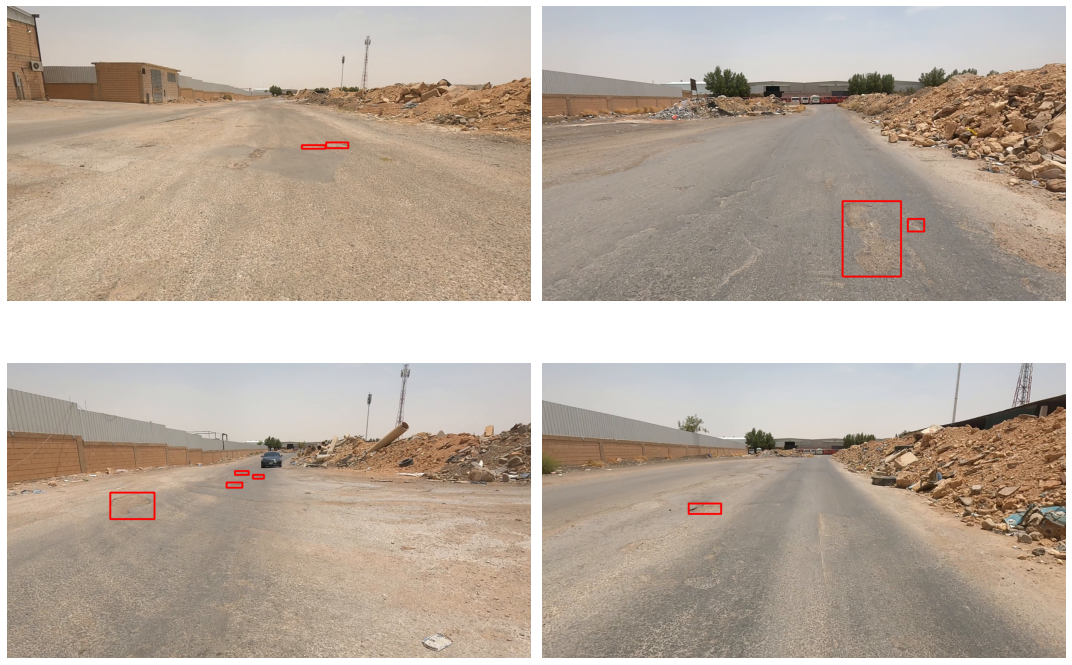

In [ ]:
# Visualize a few training images.
#Chnage the image and label paths to images and label path of the dataset
plot(
    image_paths='/content/drive/MyDrive/Pothole_detection/Pothole_detection/Combined-Dataset/images/train/', 
    label_paths='/content/drive/MyDrive/Pothole_detection/Pothole_detection/Combined-Dataset/labels/train/*.txt',
    num_samples=4,
)

## Clone the YOLOv7 GitHub Repository

In [ ]:
if not os.path.exists('yolov7'):
    !git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1127, done.
remote: Total 1127 (delta 0), reused 0 (delta 0), pack-reused 1127
Receiving objects: 100% (1127/1127), 69.93 MiB | 11.51 MiB/s, done.
Resolving deltas: 100% (525/525), done.


In [ ]:
%cd yolov7

/content/yolov7


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00


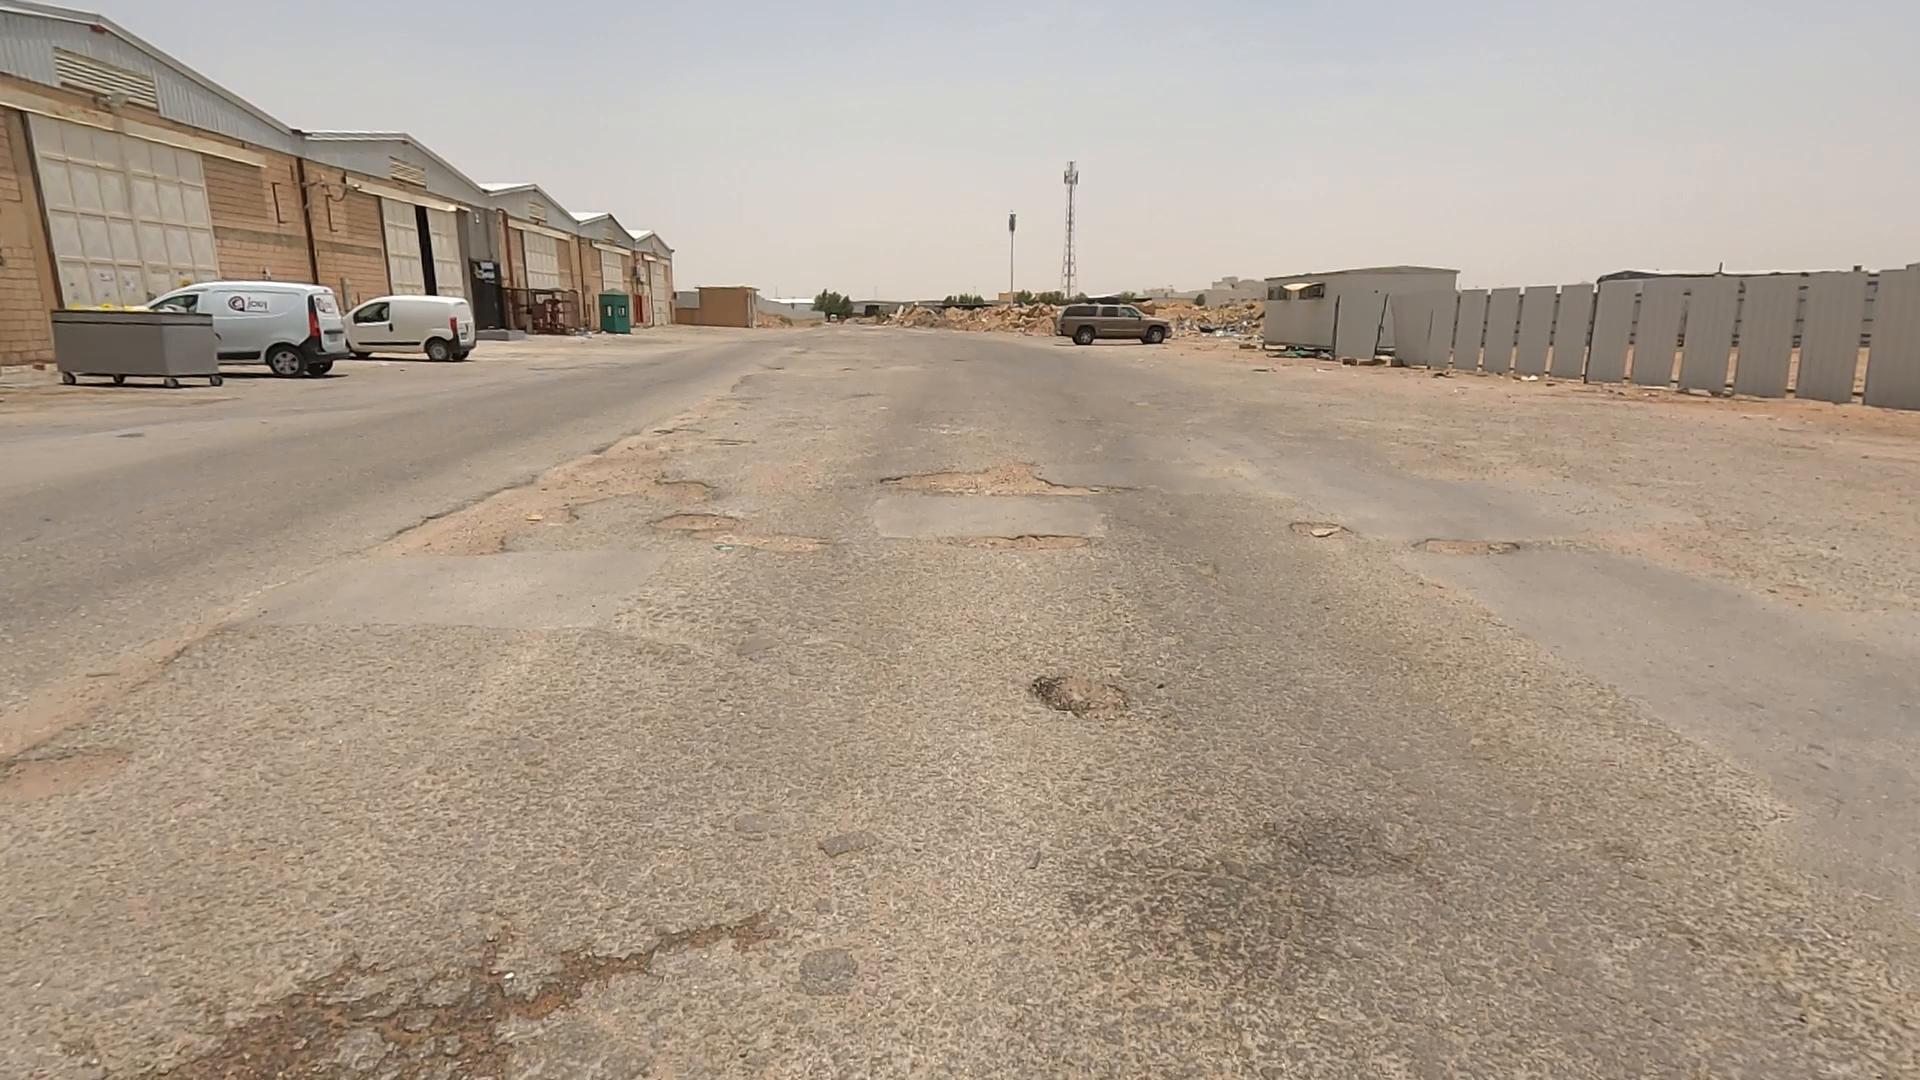

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

k= cv2.imread("/content/drive/MyDrive/Pothole_detection/Pothole_detection/Combined-Dataset/images/test/0f2acf1b-0011.png")

cv2_imshow(k)

In [ ]:
!python detect.py --weights runs/train/yolov7_tiny_pothole_fixed_res/weights/best.pt \
 --source "/content/drive/MyDrive/Pothole_detection/Pothole_detection/Combined-Dataset/images/test/0f2acf1b-0011.png" 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/Pothole_detection/Pothole_detection/Combined-Dataset/images/test/0f2acf1b-0011.png', update=False, view_img=False, weights=['runs/train/yolov7_tiny_pothole_fixed_res/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6007596 parameters, 0 gradients, 13.0 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved!

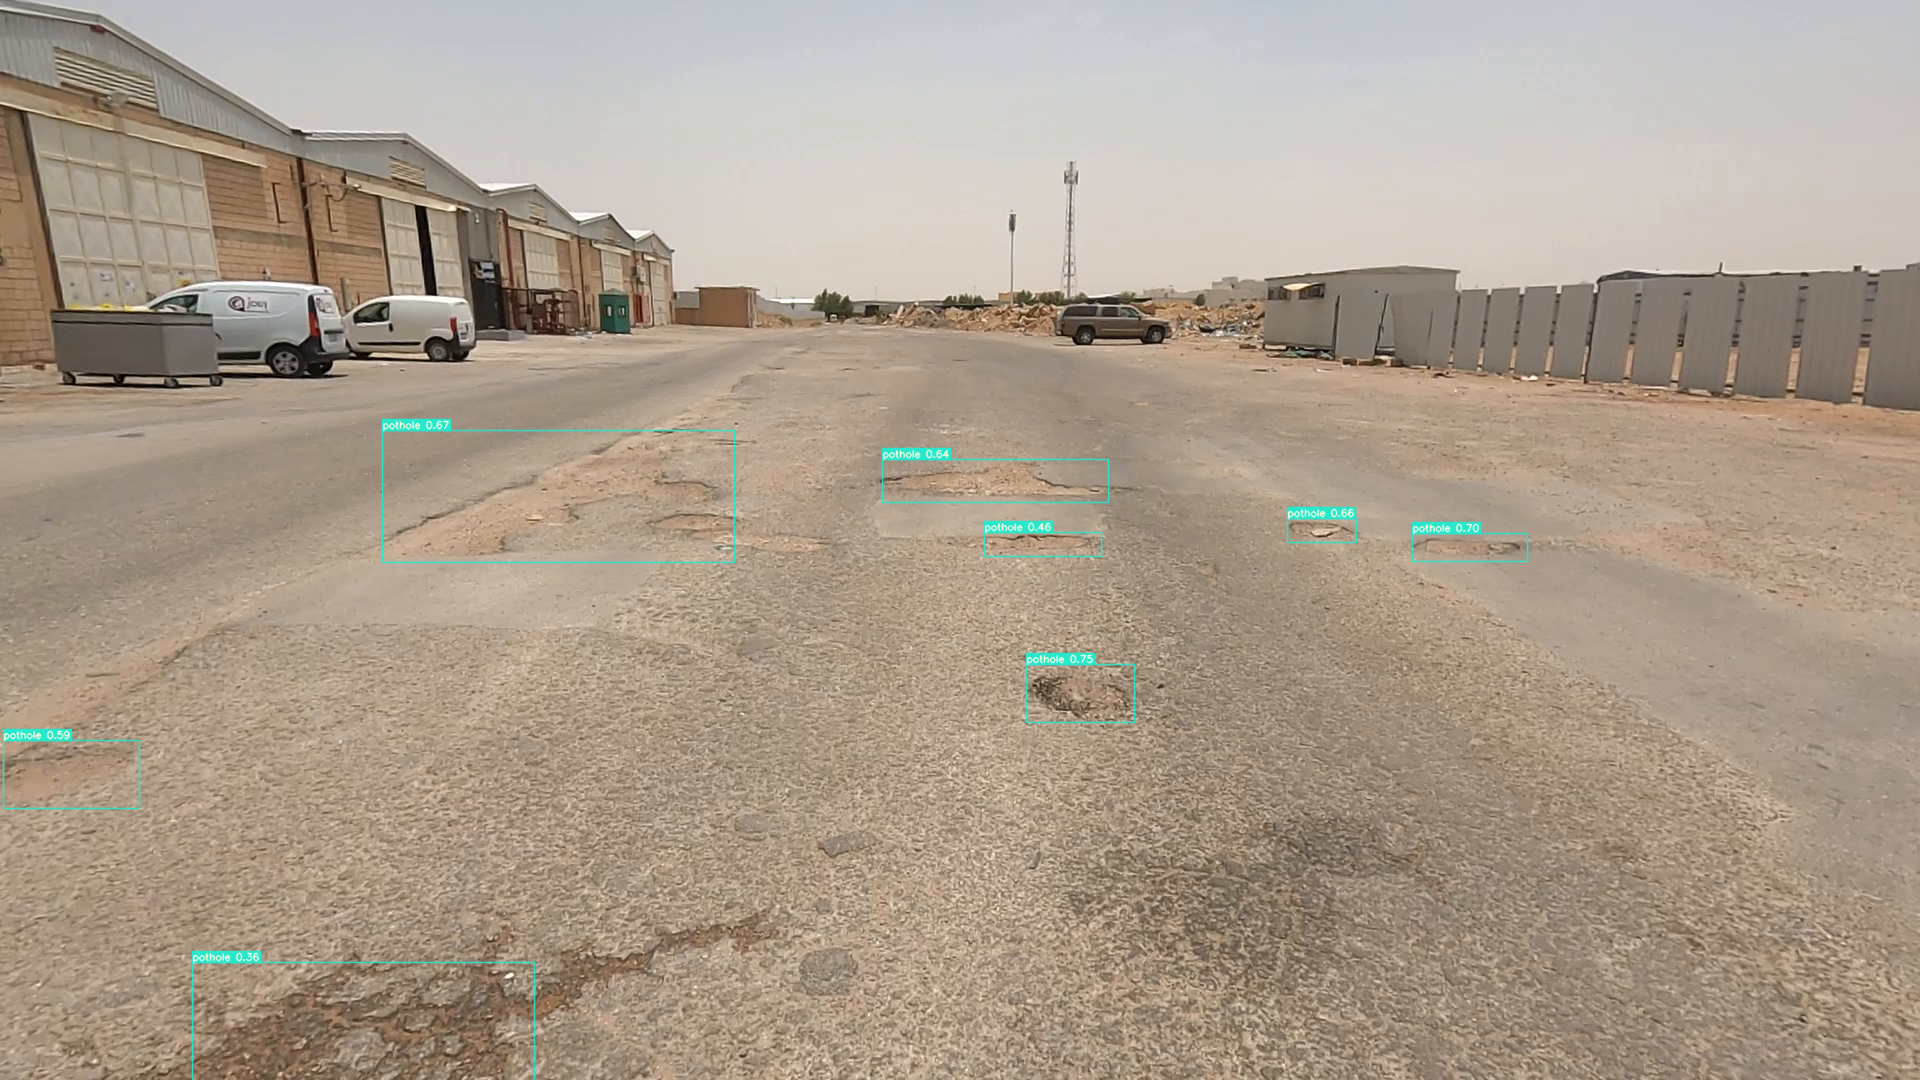

In [ ]:
k= cv2.imread("/content/yolov7/runs/detect/exp2/0f2acf1b-0011.png")

cv2_imshow(k)

In [ ]:
!python detect.py --weights runs/train/yolov7_tiny_pothole_fixed_res/weights/best.pt \
 --source /content/drive/MyDrive/Pothole_detection/Pothole_detection/input.mp4 \
 --name Scene_2 --conf 0.8

In [34]:
!python detect.py --weights /content/drive/MyDrive/Pothole_detection/Pothole_detection/Pothole-fixed-red-Zipped/weights/best.pt \
 --source /content/drive/MyDrive/Pothole_detection/Pothole_detection/sections.mov \
 --name Scene1 --conf 0.75 --save-txt
  

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.75, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='Scene1', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/drive/MyDrive/Pothole_detection/Pothole_detection/sections.mov', update=False, view_img=False, weights=['/content/drive/MyDrive/Pothole_detection/Pothole_detection/Pothole-fixed-red-Zipped/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CPU

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6007596 parameters, 0 gradients, 13.0 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is tra